https://www.kaggle.com/c/dogs-vs-cats/data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from PIL import Image
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Extract the contents of train.zip file inside dogs-vs-cats.zip into /data/train/

In [2]:
# Organize data into train, valid, test dirs

os.chdir('data/train/')
# os.system('ls')
if os.path.isdir('train/dog/') is False:
    pass
    # print(random.sample(glob.glob('cat*'), 10))
    # print(glob.glob('cat*'))
    
    os.makedirs('train/dog/')
    os.makedirs('train/cat/')
    os.makedirs('valid/dog/')
    os.makedirs('valid/cat/')
    os.makedirs('test/dog/')
    os.makedirs('test/cat/')

    for i in random.sample(glob.glob('cat*'), 500):
        pass
        shutil.move(i, 'train/cat/')      
    for i in random.sample(glob.glob('dog*'), 500):
        pass
        shutil.move(i, 'train/dog/')
    for i in random.sample(glob.glob('cat*'), 100):
        pass
        shutil.move(i, 'valid/cat/')        
    for i in random.sample(glob.glob('dog*'), 100):
        pass
        shutil.move(i, 'valid/dog/')
    for i in random.sample(glob.glob('cat*'), 50):
        pass
        shutil.move(i, 'test/cat/')      
    for i in random.sample(glob.glob('dog*'), 50):
        pass
        shutil.move(i, 'test/dog/')

os.chdir('../../')

In [3]:
train_path = 'data/train/train/'
valid_path = 'data/train/valid/'
test_path = 'data/train/test/'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


We now call next(train_batches) to generate a batch of images and labels from the training set. NOTE that the size of this batch is determined by the batch_size we set when we created train_batches.

In [5]:
imgs, labels = next(train_batches)

In [6]:
# We then use this plotting function obtained from TensorFlow's documentation to plot the processed images within our Jupyter notebook.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

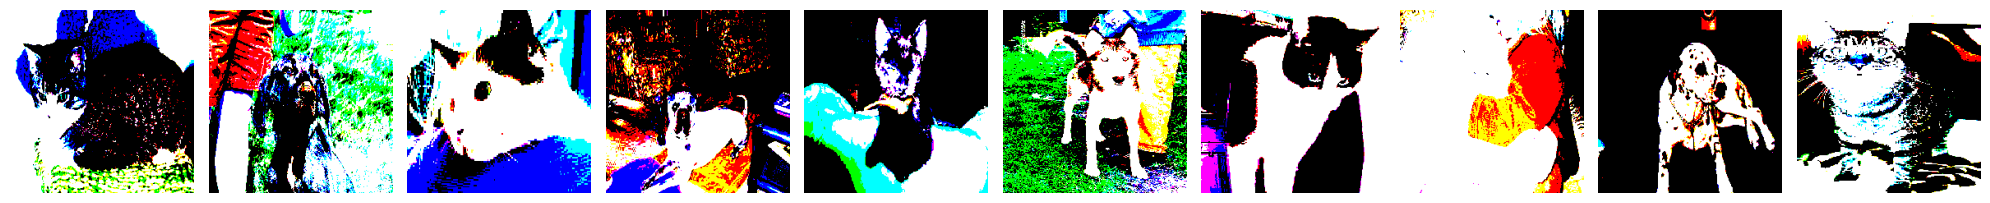

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [7]:
plotImages(imgs)
print(labels)

CNN BUILDING AND TRAINING STARTS HERE

In [8]:
# strides => cuts the image pixels into specified number (eg.:- strides=2 will cut the number of pixels by two)
# input_shape => shape of the input image (224 by 224), and the number 3 representes the reg, green and blue color channels

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(x=train_batches, steps_per_epoch=len(train_batches), validation_data=valid_batches, validation_steps=len(valid_batches), epochs=10, verbose=2)

Epoch 1/10
Epoch 1/10
100/100 - 6s - loss: 16.8527 - acc: 0.5490 - val_loss: 7.8619 - val_acc: 0.6050
Epoch 2/10
Epoch 1/10
100/100 - 5s - loss: 1.3848 - acc: 0.7890 - val_loss: 2.8522 - val_acc: 0.6650
Epoch 3/10
Epoch 1/10
100/100 - 5s - loss: 0.2398 - acc: 0.9320 - val_loss: 2.4147 - val_acc: 0.7200
Epoch 4/10
Epoch 1/10
100/100 - 5s - loss: 0.0921 - acc: 0.9770 - val_loss: 2.1894 - val_acc: 0.6550
Epoch 5/10
Epoch 1/10
100/100 - 5s - loss: 0.0369 - acc: 0.9860 - val_loss: 2.4355 - val_acc: 0.6300
Epoch 6/10
Epoch 1/10
100/100 - 5s - loss: 0.0042 - acc: 1.0000 - val_loss: 2.2442 - val_acc: 0.6600
Epoch 7/10
Epoch 1/10
100/100 - 5s - loss: 0.0011 - acc: 1.0000 - val_loss: 2.2536 - val_acc: 0.6350
Epoch 8/10
Epoch 1/10
100/100 - 5s - loss: 7.1810e-04 - acc: 1.0000 - val_loss: 2.2543 - val_acc: 0.6350
Epoch 9/10
Epoch 1/10
100/100 - 5s - loss: 5.9802e-04 - acc: 1.0000 - val_loss: 2.2524 - val_acc: 0.6350
Epoch 10/10
Epoch 1/10
100/100 - 5s - loss: 5.2265e-04 - acc: 1.0000 - val_loss: 2

PREDICTION USING TEST DATA STARTS HERE

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

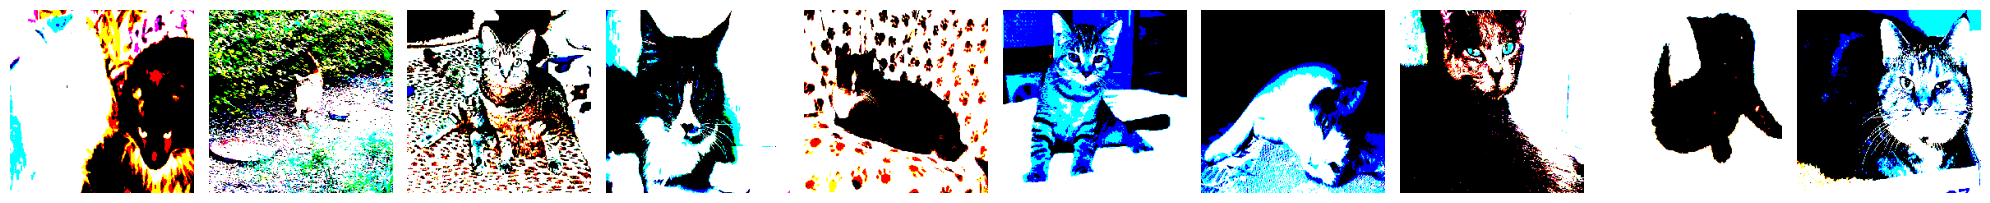

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [12]:
# loads test data
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [13]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

CONFUSION MATRIX STARTS HERE

In [14]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [15]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[35 15]
 [18 32]]


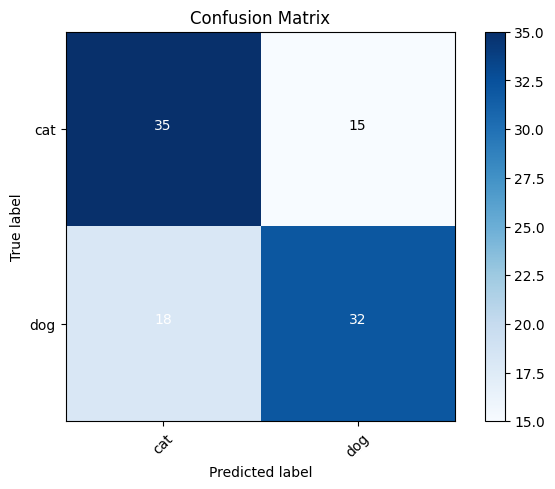

In [16]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')